In [1]:
import supervision as sv
from tqdm.notebook import tqdm

In [2]:
#from autodistill_grounding_dino import GroundingDINO
from autodistill.detection import CaptionOntology

In [15]:
import matplotlib.pyplot as plt

In [24]:
import numpy as np

In [3]:
VIDEO_DIR_PATH = "/home/aiml-machine/AiML-Projects/auto-annotation-pipeline"
IMAGE_DIR_PATH = "/home/aiml-machine/AiML-Projects/auto-annotation-pipeline/images"

In [4]:
videos_path = sv.list_files_with_extensions(
    directory=VIDEO_DIR_PATH, 
    extensions=["mov","mp4"])

In [5]:
videos_path

[PosixPath('/home/aiml-machine/AiML-Projects/auto-annotation-pipeline/video.mp4')]

In [6]:
for video_path in tqdm(videos_path):
    video_name = str(video_path).split("/")[-1]
    image_name_pattern = video_name + "-{:05d}.png"
    with sv.ImageSink(target_dir_path=IMAGE_DIR_PATH, image_name_pattern=image_name_pattern) as sink:
        for image in sv.get_video_frames_generator(source_path=str(video_path), stride=1):
            sink.save_image(image=image)

  0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
ontology = CaptionOntology({"hand gestures": "hand"})
base_model = GroundingDINO(ontology=ontology)

trying to load grounding dino directly


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)


final text_encoder_type: bert-base-uncased


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [31]:
detections = base_model.predict("images/video.mp4-00928.png")

In [36]:
detections

Detections(xyxy=array([[121.816696,  32.915512, 518.4111  , 477.39606 ]], dtype=float32), mask=None, confidence=array([0.35480452], dtype=float32), class_id=array([0]), tracker_id=None, data={})

In [21]:
box_annotator = sv.BoxAnnotator()

In [22]:
classes = ["hand"]

In [38]:
labels = [f"{classes[class_id]} {confidence:0.2f}" for bbox_coords, _, confidence, class_id, _, _ in detections]

In [52]:
bbox_coords = [np.uint16(bbox_cordinates) for bbox_cordinates, _, _, _, _, _ in detections][0]

In [53]:
bbox_coords

array([121,  32, 518, 477], dtype=uint16)

In [33]:
annotated_frame = box_annotator.annotate(scene=plt.imread("images/video.mp4-00928.png"),detections=detections)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..251.0].


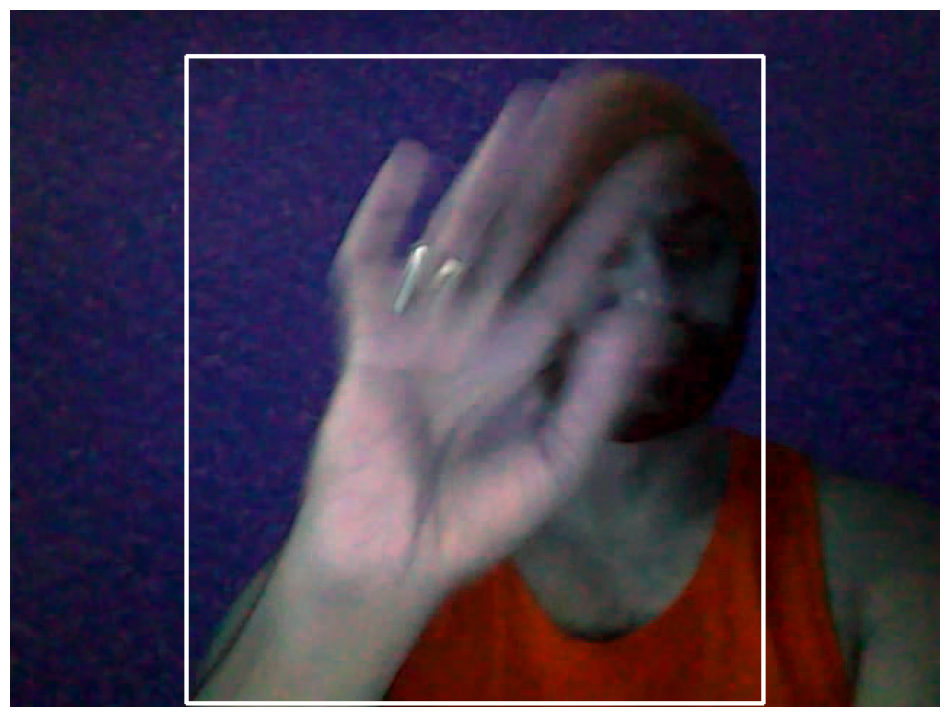

In [34]:
sv.plot_image(annotated_frame)

In [56]:
plt.imsave("detected_hand_imgs/video.mp4-00928.detected_hand.png",
           plt.imread("images/video.mp4-00928.png")[bbox_coords[1]:bbox_coords[3],bbox_coords[0]:bbox_coords[2]])

In [3]:
from autodistill_clip import CLIP

In [22]:
ontology_dict = dict()
asl_characters = "abcdefghijklmnopqrstuvwxyz0123456789"
class_id2char = dict()

for class_id, char in enumerate(asl_characters):

    ontology_dict[f"alphabet {char} in american sign language"] = char
    class_id2char[class_id] = char 

In [5]:
ontology = CaptionOntology(ontology_dict)

In [6]:
base_model = CLIP(ontology=ontology)

In [21]:
obj = base_model.predict("detected_hand_imgs/video.mp4-00928.detected_hand.png")

In [25]:
class_id2char[np.argmax(obj.confidence)]

'n'